#### Imports and Options

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_column', None)
plt.style.use('ggplot')

Here's a description of each column in the dataset:

- date: The date of the match in YYYY-MM-DD format.
- time: The time of the match, including both local time and timezone offset.
- comp: The competition name (e.g., Premier League).
- round: The match round or week in the competition (e.g., Matchweek 1).
- day: The day of the week the match was played (e.g., Mon, Tue, etc.).
- venue: Indicates whether the match was played at home or away.
- result: The outcome of the match (e.g., W for win, L for loss, D for draw).
- gf: Goals scored by the team in the match.
- ga: Goals conceded by the team in the match.
- opponent: The name of the opposing team.
- xg: Expected goals for the team in the match.
- xga: Expected goals against the team in the match.
- poss: Possession percentage during the match.
- attendance: The number of spectators present at the match (if available).
- captain: The name of the team captain during the match.
- formation: The formation used by the team in the match.
- referee: The name of the referee officiating the match.
- match report: A link or reference to the match report (if applicable).
- notes: Any additional notes related to the match.
- sh: Shots taken by the team.
- sot: Shots on target by the team.
- dist: Average distance of shots taken (in meters).
- fk: Free kicks awarded to the team.
- pk: Penalty kicks scored by the team.
- pkatt: Penalty kicks attempted by the team.
- season: The season year of the match.
- team: The name of the team playing the match.

#### Load the data

In [3]:
df = pd.read_csv("matches.csv")

In [4]:
# backup
df_raw = df.copy()
df_raw.to_csv("matches_raw.csv")

##### Cleaning and Editing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [6]:
columns = df.columns
columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [7]:
# Slecting the columns
df = df[[# 'Unnamed: 0', 'date',
    # 'time', 'comp', 
    'round', 
    #'day', 'venue', 
    'result',
    'gf', 'ga', 'opponent', 
    #'xg', 'xga', 
    'poss', 
    #'attendance', 'captain',
    'formation', 
    #'referee', 'match report', 'notes', 
    'sh', 'sot', 
    #'dist',
    # 'fk', 
    'pk', 'pkatt', 'season', 'team']]
df

,round,result,gf,ga,opponent,poss,formation,sh,sot,pk,pkatt,season,team
0,Matchweek 2,W,3,1,Wolves,65,4-2-3-1,13,8,1,1,2024,Manchester City
1,Matchweek 3,L,2,5,Leicester City,72,4-2-3-1,16,5,0,0,2024,Manchester City
2,Matchweek 4,D,1,1,Leeds United,49,4-3-3,23,1,0,0,2024,Manchester City
3,Matchweek 5,W,1,0,Arsenal,58,3-1-4-2,13,5,0,0,2024,Manchester City
4,Matchweek 6,D,1,1,West Ham,69,4-3-3,14,7,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Matchweek 34,L,1,2,Watford,56,4-2-3-1,12,3,0,0,2020,Norwich City
4784,Matchweek 35,L,0,4,West Ham,53,4-2-3-1,11,2,0,0,2020,Norwich City
4785,Matchweek 36,L,0,1,Chelsea,33,4-1-4-1,2,0,0,0,2020,Norwich City
4786,Matchweek 37,L,0,2,Burnley,42,4-2-3-1,6,2,0,0,2020,Norwich City


In [8]:
# Rearanging the columns
new_columns = ['team', 'opponent', 'round', 'result', 'gf', 'ga', 'formation', 'poss', 'sh', 'sot', 'pk', 'pkatt', 'season']
df = df[new_columns]
df

,team,opponent,round,result,gf,ga,formation,poss,sh,sot,pk,pkatt,season
0,Manchester City,Wolves,Matchweek 2,W,3,1,4-2-3-1,65,13,8,1,1,2024
1,Manchester City,Leicester City,Matchweek 3,L,2,5,4-2-3-1,72,16,5,0,0,2024
2,Manchester City,Leeds United,Matchweek 4,D,1,1,4-3-3,49,23,1,0,0,2024
3,Manchester City,Arsenal,Matchweek 5,W,1,0,3-1-4-2,58,13,5,0,0,2024
4,Manchester City,West Ham,Matchweek 6,D,1,1,4-3-3,69,14,7,0,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Norwich City,Watford,Matchweek 34,L,1,2,4-2-3-1,56,12,3,0,0,2020
4784,Norwich City,West Ham,Matchweek 35,L,0,4,4-2-3-1,53,11,2,0,0,2020
4785,Norwich City,Chelsea,Matchweek 36,L,0,1,4-1-4-1,33,2,0,0,0,2020
4786,Norwich City,Burnley,Matchweek 37,L,0,2,4-2-3-1,42,6,2,0,0,2020


In [9]:
# checking nulls
df.isna().sum()

team         0
opponent     0
round        0
result       0
gf           0
ga           0
formation    0
poss         0
sh           0
sot          0
pk           0
pkatt        0
season       0
dtype: int64

In [10]:
#checking duplicate
df.duplicated().sum()

np.int64(0)

In [11]:
#checking dtypes 
df.dtypes

team         object
opponent     object
round        object
result       object
gf            int64
ga            int64
formation    object
poss          int64
sh            int64
sot           int64
pk            int64
pkatt         int64
season        int64
dtype: object

The column selection also helped with the cleaning null values and the datatypes of the dataset is well-structered

In [12]:
# removing the "Matchweek" expression from the round and changing the dtype to int
df["round"] = df["round"].str.replace("Matchweek","").astype(int)

In [13]:
df.dtypes

team         object
opponent     object
round         int64
result       object
gf            int64
ga            int64
formation    object
poss          int64
sh            int64
sot           int64
pk            int64
pkatt         int64
season        int64
dtype: object

#### EDA and Visualization

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team       4788 non-null   object
 1   opponent   4788 non-null   object
 2   round      4788 non-null   int64 
 3   result     4788 non-null   object
 4   gf         4788 non-null   int64 
 5   ga         4788 non-null   int64 
 6   formation  4788 non-null   object
 7   poss       4788 non-null   int64 
 8   sh         4788 non-null   int64 
 9   sot        4788 non-null   int64 
 10  pk         4788 non-null   int64 
 11  pkatt      4788 non-null   int64 
 12  season     4788 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 486.4+ KB


##### Matches played by season

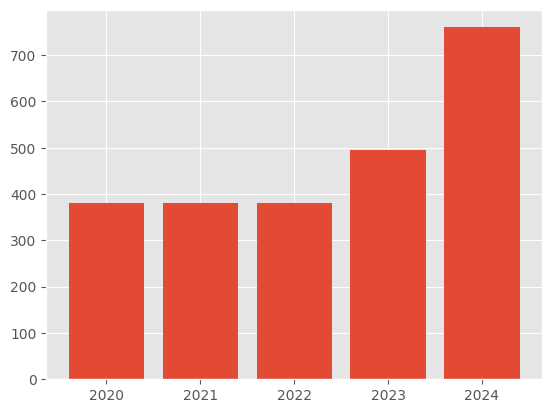

In [15]:
# # Extracting the matches played and visualizing it
season = df["season"].value_counts()
plt.bar(season.index, season.values/2) # dividing with 2 because in the data set one match logged from both teams perspective
plt.show()

In [16]:
season

season
2024    1520
2023     988
2022     760
2021     760
2020     760
Name: count, dtype: int64

Thre most played year is 2024(1520) following 2023(988), other years are equal(760)

##### Home vs Away wins

In [17]:
# Calculating wins
home_wins = 0
away_wins = 0
draws = 0
for _, row in df.iterrows():
    if(row["gf"]>row["ga"]):
        home_wins+=1
    elif(row["gf"]<row["ga"]):
        away_wins+=1
    else:
        draws+=1

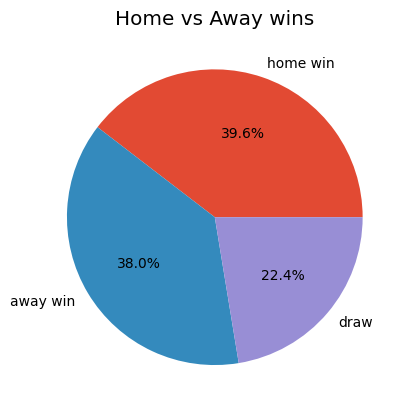

In [18]:
match_resuls = [home_wins, away_wins, draws]
label_results = ["home win", "away win", "draw"]

plt.title("Home vs Away wins")
plt.pie(match_resuls,labels=label_results,autopct='%1.1f%%')
plt.show()

Home teams(39.6%) have slightly better win rate than away teams(38.0%). The difference between home wins and away wins may caused by the atmosphere in the stadium.

##### Wins and loses for each team

In [32]:
# Extractiong win, lose, draw for each team
results_each_team = df.groupby("team")["result"].value_counts().unstack()
results_each_team

result,D,L,W
team,,,
Arsenal,42,60,126
Aston Villa,43,93,92
Bournemouth,22,59,33
Brentford,30,46,38
Brighton and Hove Albion,77,82,69
Burnley,50,93,47
Chelsea,63,75,128
Crystal Palace,63,95,70
Everton,53,96,79


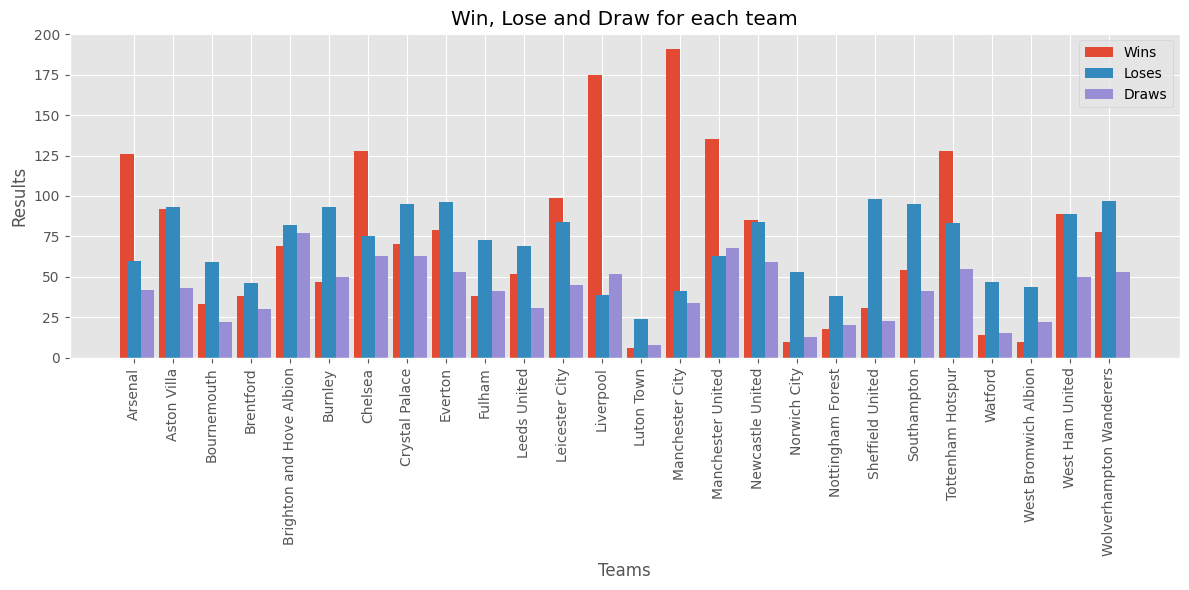

In [33]:
# Visual for win, lose, draw for each team
teams = results_each_team.index
win_each_team = results_each_team["W"]
lose_each_team = results_each_team["L"]
draw_each_team = results_each_team["D"]

x = np.arange(len(teams))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, win_each_team, width, label='Wins')
bars2 = ax.bar(x , lose_each_team, width, label='Loses')
bars3 = ax.bar(x + width, draw_each_team, width, label='Draws')

ax.set_xlabel('Teams')
ax.set_ylabel('Results')
ax.set_title('Win, Lose and Draw for each team')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

##### Formation

In [34]:
# Extracting formation information
formations = df["formation"].value_counts()
formations

formation
4-2-3-1       1382
4-3-3         1025
4-4-2          583
3-4-3          548
3-5-2          266
4-1-4-1        258
4-4-1-1        141
3-4-1-2        113
5-3-2          107
5-4-1           99
4-5-1           49
4-3-1-2         47
4-1-2-1-2◆      35
4-2-2-2         29
3-1-4-2         25
4-3-2-1         22
3-2-4-1         21
3-3-3-1         17
3-5-1-1         14
3-4-3◆           3
4-1-3-2          2
4-2-4-0          2
Name: count, dtype: int64

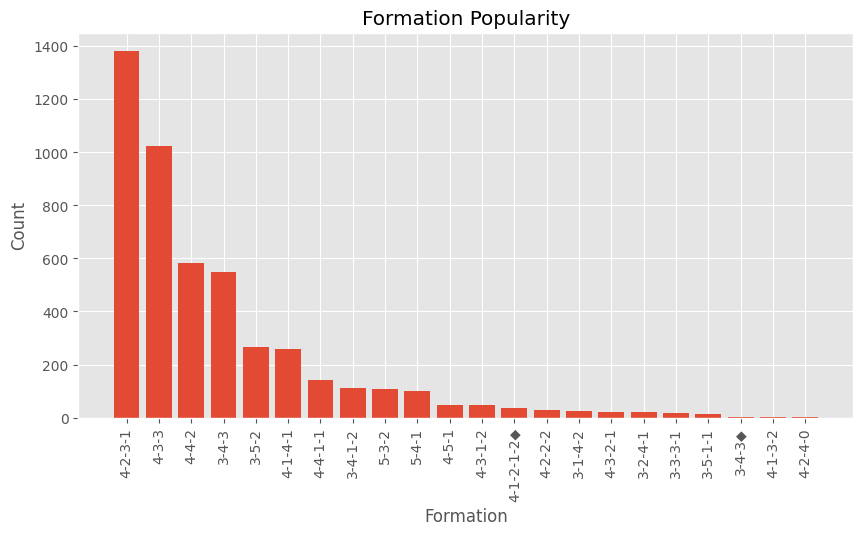

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel("Formation")
plt.ylabel("Count")
plt.title("Formation Popularity")
plt.xticks(rotation=90)
plt.bar(formations.index, formations.values)
plt.show()

- The most popular formation is 4-2-3-1 following by 4-3-3. After that there is a significant drop in popularity.

##### Formation win loses

In [23]:
# Extracting win, lose and draw for each formation
formation_win_lose = df[["formation", "result"]].groupby("formation").value_counts().unstack(fill_value=0).sort_values(by="W", ascending=False)
formation_win_lose

result,D,L,W
formation,,,
4-2-3-1,298,488,596
4-3-3,205,286,534
3-4-3,136,198,214
4-4-2,145,256,182
4-1-4-1,64,111,83
3-5-2,56,144,66
4-4-1-1,22,72,47
3-4-1-2,28,48,37
5-4-1,23,55,21


In [24]:
# Calculating winrate
formation_win_lose["winrate"] = ((formation_win_lose["W"]) / (formation_win_lose["W"] + formation_win_lose["L"] + formation_win_lose["D"]))*100
formation_win_lose["winrate"] = formation_win_lose["winrate"].round(2)
formation_win_lose

result,D,L,W,winrate
formation,,,,
4-2-3-1,298,488,596,43.13
4-3-3,205,286,534,52.10
3-4-3,136,198,214,39.05
4-4-2,145,256,182,31.22
4-1-4-1,64,111,83,32.17
3-5-2,56,144,66,24.81
4-4-1-1,22,72,47,33.33
3-4-1-2,28,48,37,32.74
5-4-1,23,55,21,21.21


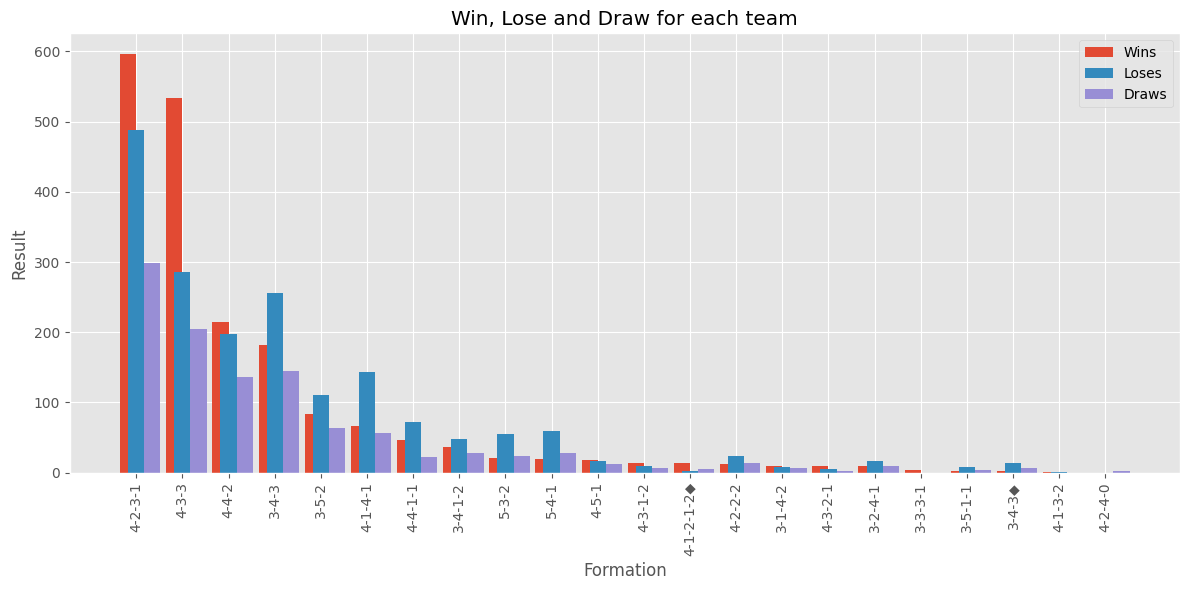

In [25]:
# Visual for formation win,lose and draw
win_each_formation = formation_win_lose["W"]
lose_each_formation = formation_win_lose["L"]
draw_each_formation = formation_win_lose["D"]

x = np.arange(len(formations.index))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, win_each_formation, width, label='Wins')
bars2 = ax.bar(x , lose_each_formation, width, label='Loses')
bars3 = ax.bar(x + width, draw_each_formation, width, label='Draws')

ax.set_xlabel('Formation')
ax.set_ylabel('Result')
ax.set_title('Win, Lose and Draw for each team')
ax.set_xticks(x)
ax.set_xticklabels(formations.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

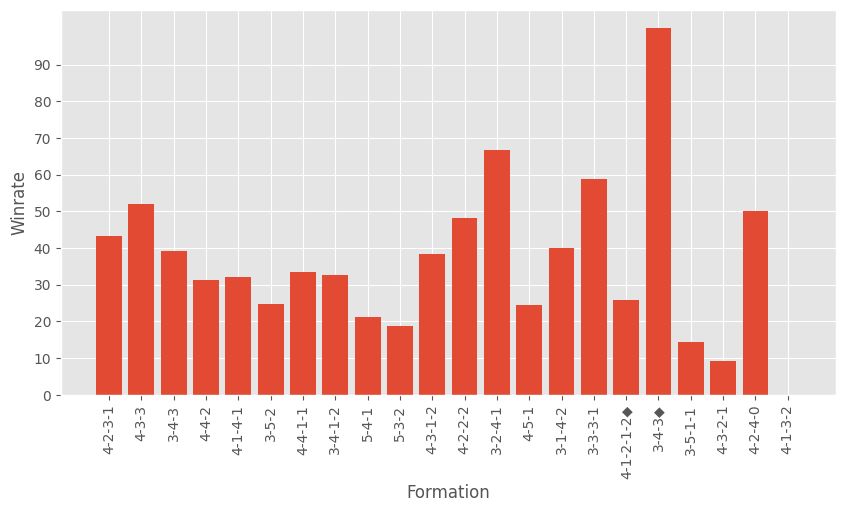

In [26]:
# visual for formation winrate
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,100,10))
plt.xlabel("Formation")
plt.ylabel("Winrate")
plt.bar(formation_win_lose.index, formation_win_lose["winrate"])
plt.show()

- Despite its poularity 4-2-3-1 formation is performing moderately good (43.13%)
- The second most popular formation 4-3-3 (52.10%) performing better than 4-2-3-1
- The most performing formation is 3-4-3◆ (100%) but since its popuşarity is low we can claim that this formation is rewarding in niche use cases and target matches

##### Penalty Outcomes

In [36]:
# getting the matches that a-has penalties in them
penalties = df[df["pkatt"] != 0][["pk","pkatt"]]
penalties

,pk,pkatt
0,1,1
6,0,1
9,1,1
15,0,1
17,1,1
...,...,...
4734,0,1
4746,2,2
4749,1,1
4772,1,1


In [37]:
# Calculating penalty rate
penalties_given = penalties["pkatt"].sum()
penalties_scored = penalties["pk"].sum()
penalties_missed = penalties_given - penalties_scored
print(f"Penalties given: {penalties_given}, Scored: {penalties_scored}, Missed: {penalties_missed}")

Penalties given: 699, Scored: 566, Missed: 133


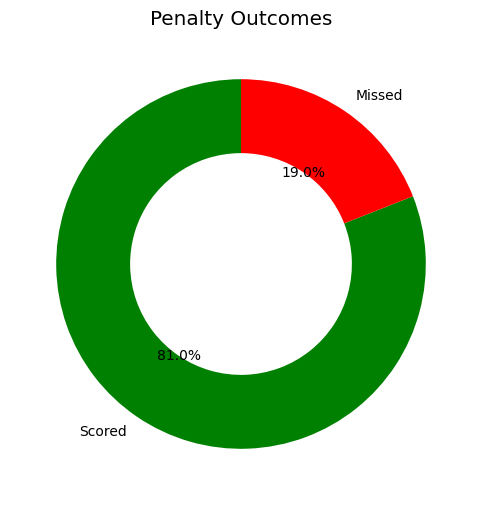

In [38]:
# visual for penalty rate
labels = ['Scored', 'Missed']
values = [penalties_scored, penalties_missed]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Penalty Outcomes')
plt.show()

##### Correlation between columns

In [30]:
# Creating point column for numerical values that identifies wins,lose,draws
points = []
for index, row in df.iterrows():
    if row["result"] == "W":
        points.append(3)
    elif row["result"] == "L":
        points.append(0)
    else:
        points.append(1)
df["points"] = points

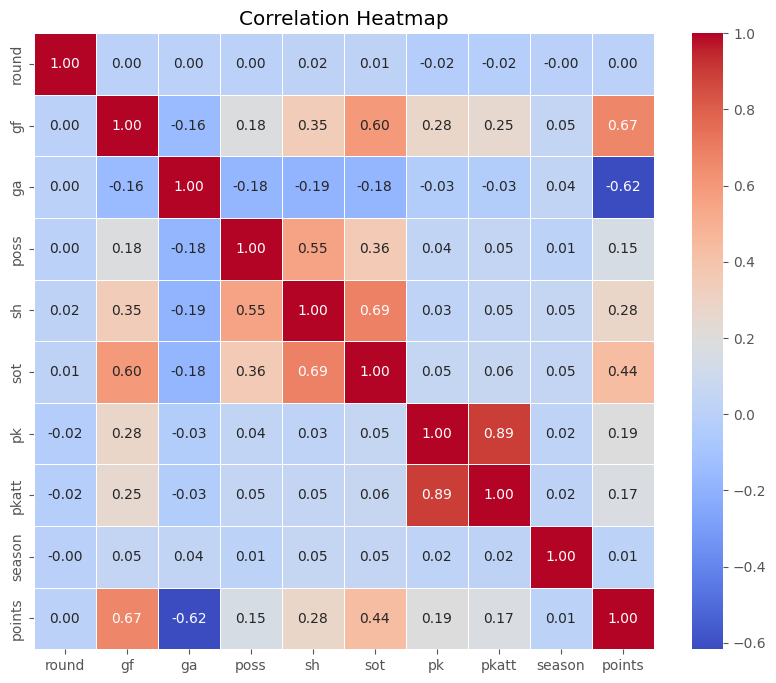

In [31]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- There is a weak positive correlation between poss and points(0.15) means that having the ball and creating positions rearly leads to points
- There is a moderate correlation between sot and points(0.44) means that taking shots on target more frequently may lead to more points
- There is a moderate to strong correlation between gf and sot(0.60) means that taking shots on target leads to more goals scored 

#### Conclusion

In this project, an analysis was conducted on football match data to explore team performances, match outcomes, and influential factors affecting results. Key insights include:

- **Home vs Away Performance:**
  - Teams generally perform better at home, with higher win rates observed in home matches.
  - Some teams exhibit strong away performance, indicating tactical flexibility.

- **Formation Analysis:**
  - Certain formations correlate with higher win rates. Notably, formations focusing on balanced midfield control showed improved outcomes.
  - Defensive formations tend to lead to lower win rates but higher draw frequencies.

- **Penalty Analysis:**
  - Total Penalties Given: **699**  
  - Penalties Scored: **566**  
  - Conversion Rate: **81%**  
 
- **Correlation Insights:**
  - Moderate positive correlation found between possession percentage and match victories.
  - High shot counts don't always translate to wins, suggesting the importance of shot quality over quantity.

### **Key Takeaways:**
- Tactical choices such as formation have a measurable impact on match outcomes.
- Home advantage remains a significant factor in football results.
- While possession helps, it must be converted into quality chances to ensure success.

---

This analysis demonstrates the ability to extract actionable insights from sports data through structured exploration and visualization.

